In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [72]:
from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.model_selection import train_test_split

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
df = pd.read_csv("customers.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [19]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [20]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [21]:
df.shape

(10695, 11)

In [22]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [23]:
df = df.drop('ID',axis=1)
df = df.drop('Var_1',axis=1)

In [24]:
df_cleaned = df.dropna(axis=0)

In [25]:
df_cleaned.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [27]:
df_cleaned.shape

(8896, 9)

In [28]:
df_cleaned.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [29]:
df_cleaned['Gender'].unique()
df_cleaned['Ever_Married'].unique()
df_cleaned['Graduated'].unique()
df_cleaned['Profession'].unique()
df_cleaned['Spending_Score'].unique()
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [30]:
categories_list=[['Male', 'Female'],['No', 'Yes'],
                 ['No', 'Yes'],['Healthcare', 'Engineer',
                 'Lawyer','Artist', 'Doctor','Homemaker',
                 'Entertainment', 'Marketing', 'Executive'],
                 ['Low', 'Average', 'High']]

In [31]:
enc = OrdinalEncoder(categories=categories_list)

In [32]:
df1 = df_cleaned.copy()

In [33]:
df1[['Gender','Ever_Married',
     'Graduated','Profession',
     'Spending_Score']] = enc.fit_transform(df1[['Gender',
     						'Ever_Married','Graduated',
                            'Profession','Spending_Score']])

In [34]:
df1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,0.0,22,0.0,0.0,1.0,0.0,4.0,D
2,1.0,1.0,67,1.0,1.0,1.0,0.0,1.0,B
3,0.0,1.0,67,1.0,2.0,0.0,2.0,2.0,B
5,0.0,1.0,56,0.0,3.0,0.0,1.0,2.0,C
6,0.0,0.0,32,1.0,0.0,1.0,0.0,3.0,C
...,...,...,...,...,...,...,...,...,...
10689,1.0,0.0,35,1.0,6.0,1.0,0.0,2.0,D
10690,0.0,0.0,29,0.0,0.0,9.0,0.0,4.0,B
10691,1.0,0.0,35,1.0,4.0,1.0,0.0,1.0,A
10693,0.0,1.0,47,1.0,8.0,1.0,2.0,5.0,C


In [35]:
df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation        object
dtype: object

In [36]:
le = LabelEncoder()

In [37]:
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])

In [38]:
df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [39]:
corr = df1.corr()

<Axes: >

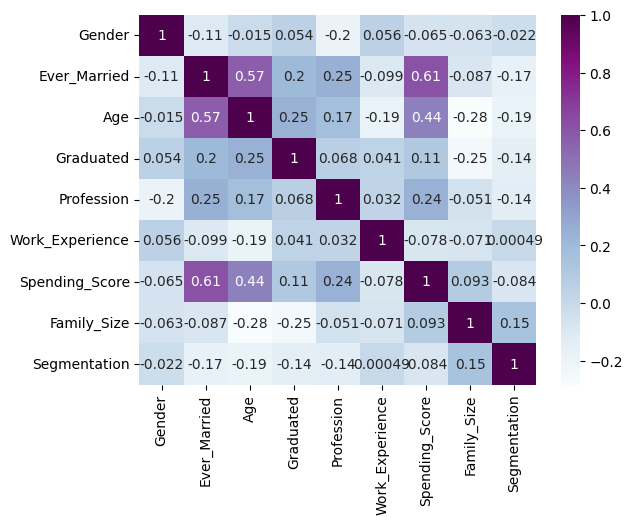

In [40]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="BuPu",
            annot= True)

<ipython-input-41-29dcdd096848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

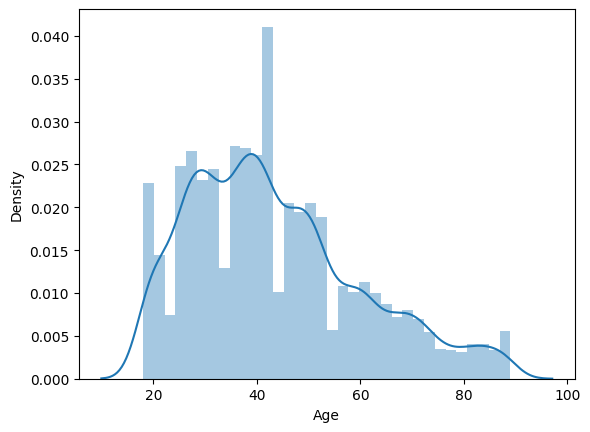

In [41]:
sns.distplot(df1['Age'])


In [42]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Family_Size', ylabel='Age'>

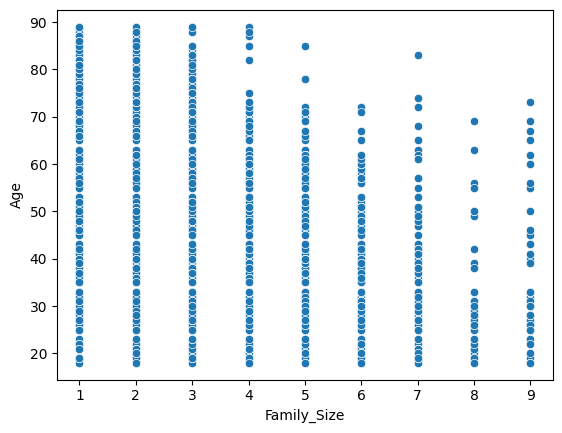

In [43]:
sns.scatterplot(x='Family_Size',y='Age',data=df1)

In [44]:
scale = MinMaxScaler()
scale.fit(df1[["Age"]]) # Fetching Age column alone
df1[["Age"]] = scale.transform(df1[["Age"]])

In [45]:
df1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,0.449753,0.591389,0.359171,0.633543,3.284735,2.612747,0.545414,2.841165,1.518660
std,0.497497,0.491605,0.233407,0.481863,2.346963,3.391636,0.738536,1.533532,1.146635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.183099,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,0.323944,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,0.492958,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [46]:
df1['Segmentation'].unique()

array([3, 1, 2, 0])

In [47]:
x = df1[['Gender','Ever_Married','Age','Graduated',
		 'Profession','Work_Experience','Spending_Score',
         'Family_Size']].values
y1 = df1[['Segmentation']].values

In [48]:
ohe = OneHotEncoder()
ohe.fit(y1)

OneHotEncoder()

In [49]:
y = ohe.transform(y1).toarray()

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=50)

In [52]:
ai = Sequential([Dense(77,input_shape = [8]),
                 Dense(67,activation="relu"),
                 Dense(58,activation="relu"),
                 Dense(37,activation="relu"),
                 Dense(4,activation="softmax")])

In [53]:
ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [54]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max',
    verbose=1,
    patience=20)

In [55]:
ai.fit( x = x_train, y = y_train,
        epochs=500, batch_size=256,
        validation_data=(x_test,y_test),
        callbacks = [early_stop]
        )

Epoch 1/500
24/24 [==============================] - 4s 35ms/step - loss: 1.3379 - accuracy: 0.3604 - val_loss: 1.2807 - val_accuracy: 0.4191
Epoch 2/500
24/24 [==============================] - 0s 17ms/step - loss: 1.2706 - accuracy: 0.4194 - val_loss: 1.2543 - val_accuracy: 0.4282
Epoch 3/500
24/24 [==============================] - 0s 15ms/step - loss: 1.2545 - accuracy: 0.4302 - val_loss: 1.2350 - val_accuracy: 0.4417
Epoch 4/500
24/24 [==============================] - 0s 10ms/step - loss: 1.2439 - accuracy: 0.4304 - val_loss: 1.2273 - val_accuracy: 0.4582
Epoch 5/500
24/24 [==============================] - 0s 12ms/step - loss: 1.2385 - accuracy: 0.4442 - val_loss: 1.2240 - val_accuracy: 0.4592
Epoch 6/500
24/24 [==============================] - 0s 8ms/step - loss: 1.2294 - accuracy: 0.4477 - val_loss: 1.2216 - val_accuracy: 0.4575
Epoch 7/500
24/24 [==============================] - 0s 10ms/step - loss: 1.2261 - accuracy: 0.4482 - val_loss: 1.2159 - val_accuracy: 0.4599
Epoch 8

In [56]:
metrics = pd.DataFrame(ai.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.337902,0.360371,1.280697,0.419083
1,1.270559,0.419393,1.254250,0.428186
2,1.254496,0.430185,1.235019,0.441672
3,1.243856,0.430354,1.227269,0.458193
4,1.238488,0.444182,1.223998,0.459204


<Axes: >

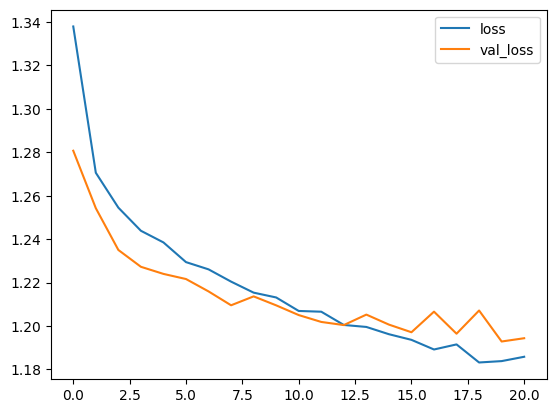

In [57]:
metrics[['loss','val_loss']].plot()


<Axes: >

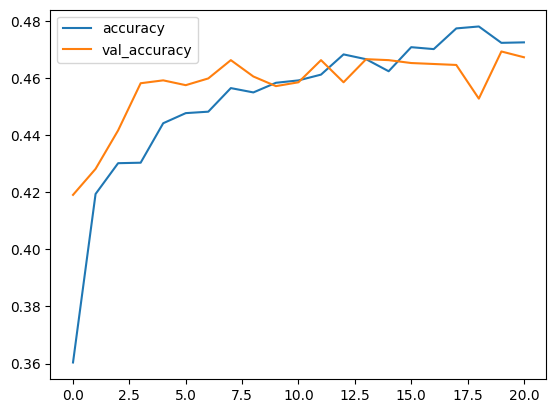

In [58]:
metrics[['accuracy','val_accuracy']].plot()

In [59]:
x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape

93/93 [==============================] - 0s 1ms/step


(2966,)

In [60]:
y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

(2966,)

In [61]:
conf(y_truevalue,x_pred)

array([[400, 130,  97, 152],
       [262, 152, 173,  82],
       [168, 126, 354,  83],
       [221,  45,  41, 480]])

In [62]:
print(report(y_truevalue,x_pred))

              precision    recall  f1-score   support

           0       0.38      0.51      0.44       779
           1       0.34      0.23      0.27       669
           2       0.53      0.48      0.51       731
           3       0.60      0.61      0.61       787

    accuracy                           0.47      2966
   macro avg       0.46      0.46      0.46      2966
weighted avg       0.47      0.47      0.46      2966



In [63]:
import pickle

In [67]:
# Saving the Model
ai.save('customer_classification_model.h5')
# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le], fh)
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le]=pickle.load(fh)

In [75]:
x_prediction = np.argmax(ai_brain.predict(x_test[1:2,:]), axis=1)
print(x_prediction)
print(le.inverse_transform(x_prediction))

1/1 [==============================] - 0s 33ms/step
[0]
['A']
